# STA365 Homework 4

## Part 1


In [ ]:
# Import necessary modules
import random
import pymc as pm
import arviz as az
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'location'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

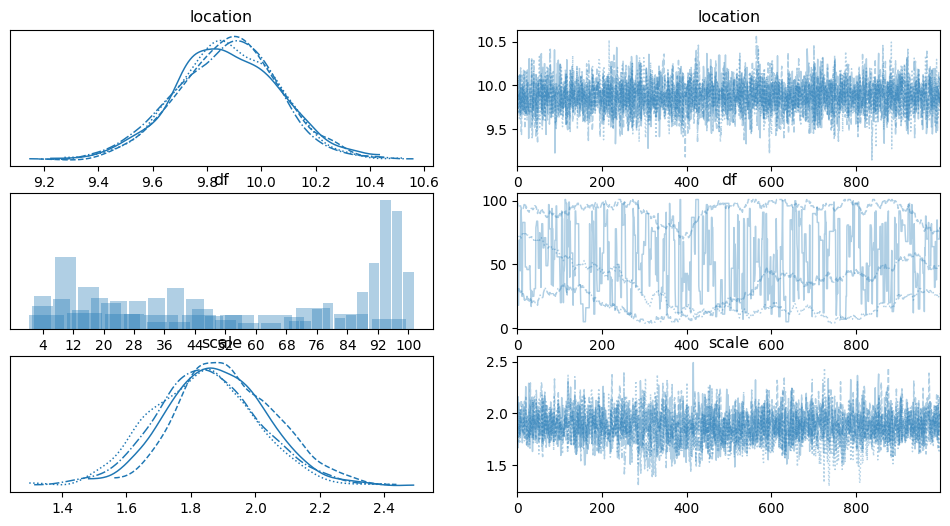

In [ ]:
# Set seed for replication
random.seed(365)
# Specify parameters to generate data
n = 100
loc_true = 10
scale_true = 2
df_true = 15

# Specify hyperparameters for priors
mu_0 = 0
sigma_0 = 10
scale_0 = 5
low_0 = 1
high_0 = 101

# Generate data from the student t distribution
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

# Specify the model in PyMC
with pm.Model() as t_norm__halfnorm_discrete_uniform:
  location = pm.Normal("location", mu = mu_0, sigma = sigma_0)
  scale = pm.HalfNormal("scale", sigma = scale_0)
  df = pm.DiscreteUniform("df", lower = low_0, upper = high_0)
  x_obs = pm.StudentT("likelihood", mu = location, sigma = scale,
                      nu = df, observed = x)
  idata = pm.sample(chains = 4)

# Plot the trace plots
az.plot_trace(idata)

I replicated the same model with t-norm-halfnorm-discrete-uniform specification as the lecture example, with the same choice of hyper-parameters and data generating process. From the trace plots, I can see that the posterior distributions for location and scale parameters are close to the true parameter values, but the posterior distribution of degrees of freedom is way far away from the true parameter values being 15. I will then increase the sample size to see whether the estimation of degrees of freedom will be closer to 15.

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'location'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

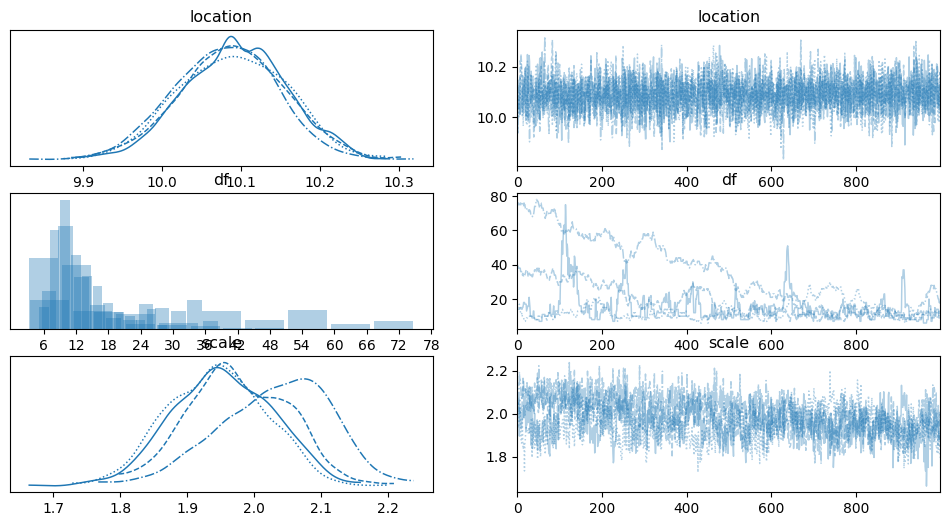

In [ ]:
# Set seed for replication
random.seed(365)
# Specify a greater number of sample size
n = 1000
loc_true = 10
scale_true = 2
df_true = 15

# Specify hyperparameters for priors
mu_0 = 0
sigma_0 = 10
scale_0 = 5
low_0 = 1
high_0 = 101

# Generate data from the student t distribution
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

# Specify the model in PyMC
with pm.Model() as t_norm__halfnorm_discrete_uniform:
  location = pm.Normal("location", mu = mu_0, sigma = sigma_0)
  scale = pm.HalfNormal("scale", sigma = scale_0)
  df = pm.DiscreteUniform("df", lower = low_0, upper = high_0)
  x_obs = pm.StudentT("likelihood", mu = location, sigma = scale,
                      nu = df, observed = x)
  idata = pm.sample(chains = 4)

# Plot the trace plots
az.plot_trace(idata)

Now I have increased the sample size to 1000 from 100, and I realize that the posterior distribution of degrees of freedom does get closer to 15, but with a right-skewed shape. I will further more increase the sample size and see if the result gets better.

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([[<Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'location'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

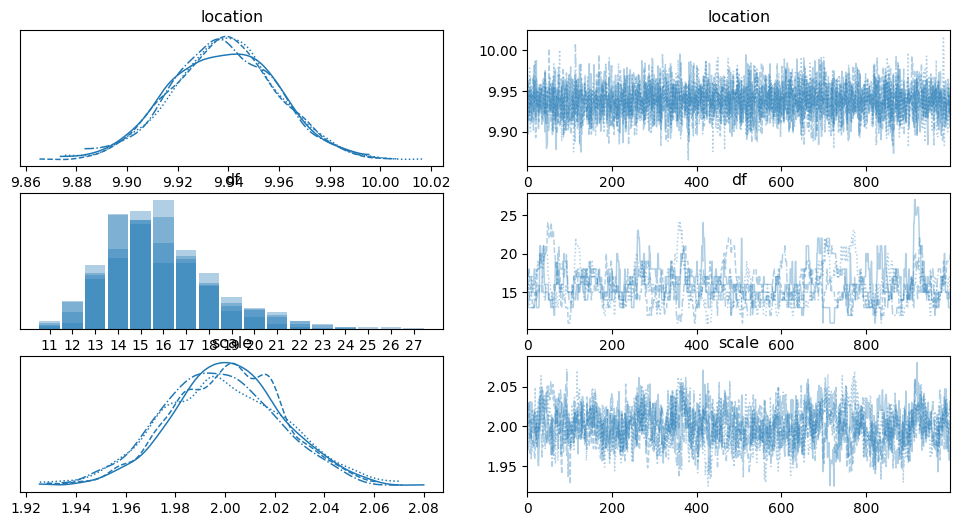

In [ ]:
# Set seed for replication
random.seed(365)
# Specify an even sample size this time
n = 10000
loc_true = 10
scale_true = 2
df_true = 15

# Specify hyperparameters for priors
mu_0 = 0
sigma_0 = 10
scale_0 = 5
low_0 = 1
high_0 = 101

# Generate data from the student t distribution
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

# Specify the model in PyMC
with pm.Model() as t_norm__halfnorm_discrete_uniform:
  location = pm.Normal("location", mu = mu_0, sigma = sigma_0)
  scale = pm.HalfNormal("scale", sigma = scale_0)
  df = pm.DiscreteUniform("df", lower = low_0, upper = high_0)
  x_obs = pm.StudentT("likelihood", mu = location, sigma = scale,
                      nu = df, observed = x)
  idata = pm.sample(chains = 4)

# Plot the trace plots
az.plot_trace(idata)

Now that I have increased the sample size to 10000, we can see that the posterior distribution of degrees of freedom is much better compared to previous ones, since the distribution has its mode at around 15 to 16, which is close enough to 15.

# Part 2

In [ ]:
# Generate summary statistics
print("Number of MCMC samples: ",
      idata.posterior['location'].values.flatten().shape[-1])
az.summary(idata, round_to=2)

Number of MCMC samples:  4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
location,9.94,0.02,9.90,9.98,0.00,0.00,3922.23,2685.67,1.00
df,15.79,2.33,12.00,20.00,0.17,0.12,202.39,358.36,1.01
scale,2.00,0.02,1.95,2.04,0.00,0.00,349.13,677.01,1.01


According to the summary table above, the effective sample size for parameter location is 3922.23, which is very close to the total sample size per chain (4000), which means that we have little auto-correlation in the MCMC chains and we have a large number of effective samples. However, the effective sample sizes for parameters degrees of freedom and scale are far less than 4000, indicating that we have strong autocorrelation in the chains and thus reduces the effective sample size significantly.

The R-hat statistics measures the level of convergence, as all R-hats are less than 1.05, we conclude that we do not have convergence issue with our chains. Looking at the trace plots, we can see that the chains for scale and location converge as they overlap frequently with one another. For degrees of freedom, we might have some minor divergence issues as those chains sometimes deviate a lot from each other, but given the fact that the overall R-hat is less than 1.05, the divergence issue should be fine.



Text(0.5, 1.0, 'Acceptance Rates')

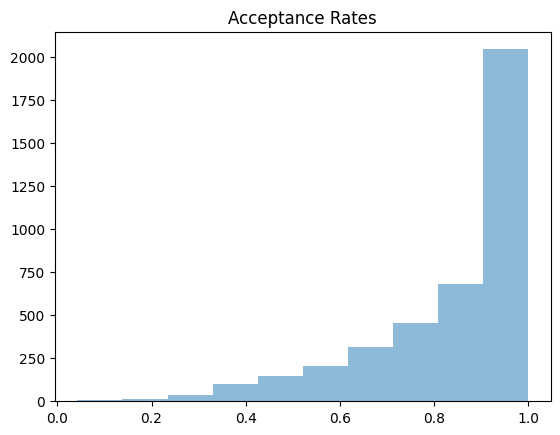

In [27]:
# Plot the distribution of acceptance rates
plt.hist(idata.sample_stats.acceptance_rate.values.flatten(), alpha=0.5)
plt.title('Acceptance Rates')

From the above histogram of distribution of acceptance rates from 4000 samples per chain, we can see that most samples have acceptance rates that are close to 1, which is good since it indicates that most proposals are accepted so our chains are not sticky, and there are cases when extreme proposals have lower acceptance rate. This distribution matches with our expectation of the HMC algorithm.

Finally, PyMC gives me a warning saying "the effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation". This indicates that, in order to produce more reliable R-hat and effective sample size, I may need to further increase the sample size of data, which could be computationally expensive but worth trying.

The uncentered parameterization of the model performs better than the centered parameterization because having symmetric proposal distributions can simplify the computation of acceptance rates and preventing drifts from moving away from the probability mass.

<Axes: >

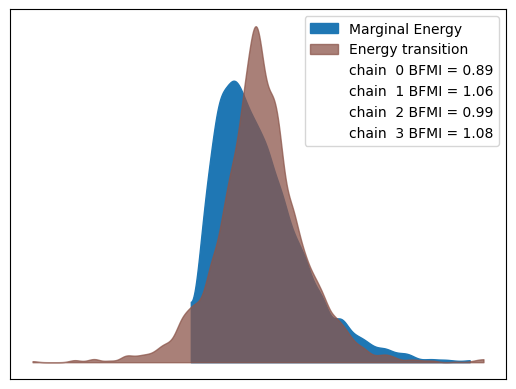

In [28]:
az.plot_energy(idata)

We would like the distribution of energy transition and marginal energy to be similar in terms of spread and mode. In our case, the spread of the marginal energy is very similar to that of marginal energy except for the left tail, where we do not observe marginal energy spread to the left tail. The mode of the two densities are somehow close but not exactly, and the overall distribution of energy transition is narrower in the center. Therefore, the model given by the HMC algorithm is still improvable, as we may end up with biased posterior estimates where the left tail is not sampled for enough times. This kind of support the previous conclusion that there are some divergencies in chains and effective sample size being too small for some parameters, but the overall convergence issue is not terrible.